In [12]:
println("loading Plots module - plotly")
using Plots
gr()
println("loading LinearAlgebra")
using LinearAlgebra

loading Plots module - plotly
loading LinearAlgebra


In [15]:
println("space discretization")
begin #space discretization
  L = 1
  Nx = 100
  xl = LinRange(0,L,Nx+2)
  xlu = xl[2:end-1]
  Δx = L/(Nx+1)
end;

space discretization


In [16]:
println("time discretization")
begin #time discretization
    T=1
    Nt=100
    tl=LinRange(0,T,Nt)
    Δt=T/(Nt-1)
end;

time discretization


In [17]:
c(x) =1; #velocity profile

println("constructing discretization matrix")
begin #discretization matrix
    M11=zeros(Nx,Nx)
    M12=I
    beta1 = (c.(xlu[2:end]).^2)./Δx^2
    alfa = (c.(xlu).^2).*(-2)/Δx^2
    beta2 = (c.(xlu[1:end-1]).^2)./Δx^2
    M21=Tridiagonal(beta1,alfa,beta2)
    M22=zeros(Nx,Nx)
    M= [M11 M12;M21 M22]
end;

constructing discretization matrix


In [18]:
println("constructing Crank-Nicolson matrix")
begin #Crank-Nicolson method
    MMl=I-M.*(Δt/2) #left-hand side matrix
    MMr=I+M.*(Δt/2) #right-hand side matrix
    iMM=inv(Array(MMl))*MMr
end;

constructing Crank-Nicolson matrix


In [19]:
println("Defining initial conditions")
begin #initial conditions
    phi0=sin.((pi/L).*xlu)
    pi0=zeros(Nx)
    sol= [[phi0; pi0]]
end;

Defining initial conditions


In [20]:
println("Applying implict Euler method")
begin #applies implicit Euler method
    for i in 1:Nt
        push!(sol,iMM*sol[i][:])
    end
end;

Applying implict Euler method


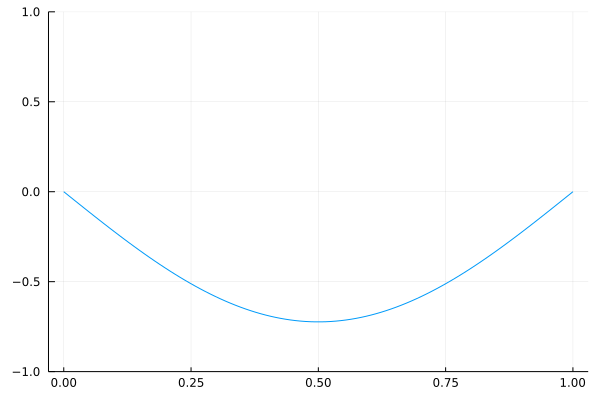

In [23]:
i = 76
plot(xl,[0;sol[i][1:Nx];0],legend=false,ylims=(-1,1))

In [24]:
begin # Initial conditions (can be chosen at will)
    function pluck(x) # Initial triangular-shaped string
        px = 2*L/3 # Position of the vertex
        py = 1 # Height of the vertex
        if x < px
            py/px*x
        else
            py/(L-px)*(-x+L)
        end
    end
    function gauss(x) # Initial Gaussian-shaped string
        μ = L/2 # Mean
        σ = L/100 # Standard deviation
        exp(-(x-μ)^2/(2*σ)^2)
    end
    function dgauss(x) # Time derivate of gauss(x)
        μ = L/2 # Mean
        σ = L/100 # Standard deviation
        exp(-(x-μ)^2/(2*σ)^2)*(-2)/(2*σ^2)*(x-μ)*(c(x))
    end
    phi0 = gauss.(xlu)#=pluck.(xlu)=##=sin.((pi/L).*xlu)=# # Initial position Φ0
    pi0 = #=dgauss.(xlu)=#zeros(Nx) # Initial velocity Π0
    sol = [[phi0; pi0]] # Initial Y vector (see LaTeX document)
end;

In [25]:
begin # Time evolution
    for i in 1:(Nt-1)
        push!(sol,iMM*sol[i][:])
    end
end;

In [26]:
#===============================================================================
CALCULATING THE "ENERGY" FUNCTION (SANITY CHECK)
===============================================================================#
begin # Separating the position and velocity parts from the Y vector
    PHI = [] # Position Φ
    PI = [] # Velocity Π
    for i in 1:Nt
        push!(PHI,[0;sol[i][1:Nx];0])
        push!(PI,[0;sol[i][Nx+1:end];0])
    end
end;

In [27]:
begin # Calculating the gradient ∇Φ for all time steps (excluding the boundaries)
    dPHI = [] # Gradient ∇Φ
    for i in 1:Nt
        aux = (PHI[i][3:end].-PHI[i][1:end-2])./(2*Δx) # Second-order formula
        push!(dPHI,aux)
    end
end;

In [28]:
begin # Calculating "energy" density function
    energy = [] # "Energy" density
    for i in 1:Nt
        push!(energy,(1)./((c.(xlu)).^2).*((PI[i][2:end-1]).^2).+((dPHI[i][:]).^2)) # See LaTeX document
    end
end;

In [29]:
begin # Simpson's rule for total "energy"
    ENERGY = [] # Integral of "energy" density for all time steps
    Simpson = [1;zeros(Nx-2);1] # Vector of weights from Simpson's formula
    for i in 2:Nx-1
        if i % 2 == 0
            Simpson[i] = 4
        else
            Simpson[i] = 2
        end
    end
    Simpson = Simpson.*(Δx/3)
    for i in 1:Nt
        push!(ENERGY,dot(Simpson,energy[i]))
    end
end;

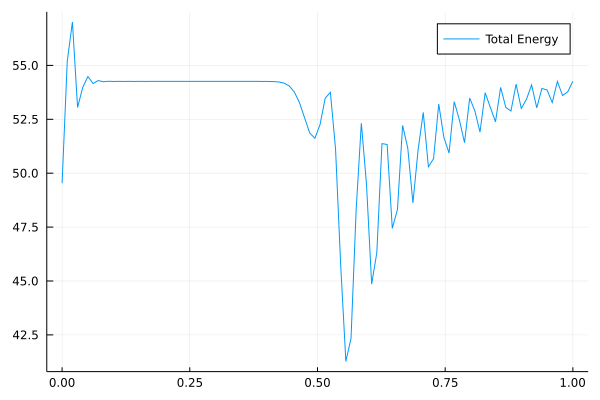

In [31]:
plot(tl,ENERGY,label="Total Energy")

3.789586637789314

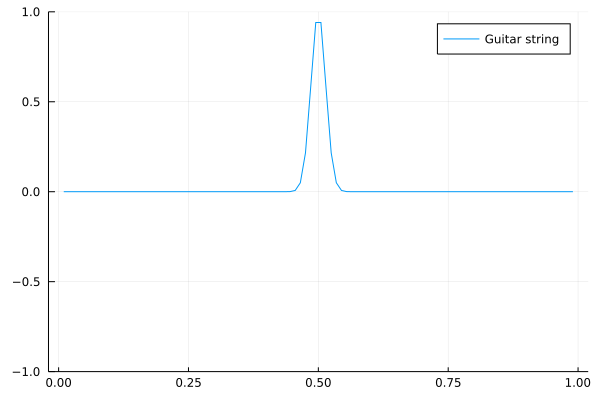

In [41]:
i =1
plot(xlu,PHI[i][2:end-1],label="Guitar string",ylims=(-1,1)) 

In [39]:
total_energy = []
for i in 1:Nt
    push!(total_energy,sum(abs.(PHI[i][2:end-1])))
end


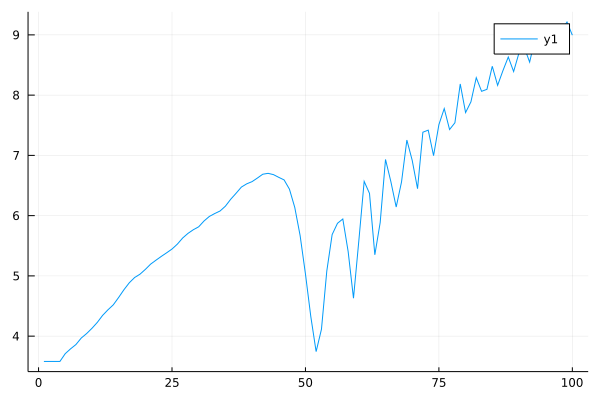

In [40]:
plot(total_energy)